# Explore here

In [15]:
import os
import pandas as pd
#import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import base64
import requests

# load the .env file variables
load_dotenv()

True

In [20]:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Encode the client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Prepare the token request
token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {client_credentials_base64.decode()}"
}
data = {
    "grant_type": "client_credentials"
}

# Request access token
response = requests.post(token_url, headers=headers, data=data)

# Check if the request was successful
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained!")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)

Access token obtained!


In [21]:
access_token

'BQCETapGA_nod1QgkDH0TOwsCZQ7-yy1aQOefNWxOJYM2Ci3j7zvo05rO9nFdIlibRE0DxL3CbwwSRMumYRKCL9rebe50q-BvRucvaqPmOR0uv5QItc'

In [22]:
artist_id = "3lFDsTyYNPQc8WzJExnQWn"


In [23]:
# Get top 10 songs
top_tracks = sp.artist_top_tracks(artist_id, country='US')

In [32]:
for idx, track in enumerate(top_tracks['tracks'], start=1):
     # print(f"Track data: {track}")
    track_name = track['name']
    album_name = track['album']['name']
    print(f"{idx}. {track_name} - Album: {album_name}- Popularity: {track['popularity']} - Duration: {track['duration_ms']/60000} minutes")
    

1. Talk It Up - Album: The Good Life- Popularity: 55 - Duration: 3.974666666666667 minutes
2. Kick It to Me - Album: The Good Life- Popularity: 53 - Duration: 6.46 minutes
3. Good Life - Album: The Good Life- Popularity: 51 - Duration: 3.933333333333333 minutes
4. No Rulebook - Album: Something for Everybody- Popularity: 46 - Duration: 3.892733333333333 minutes
5. Coming Home Song - Album: Something for Everybody- Popularity: 47 - Duration: 3.3494 minutes
6. Cool-Doug, at Night - Album: Something for Everybody- Popularity: 47 - Duration: 3.5465 minutes
7. The Feeling - Album: The Good Life- Popularity: 50 - Duration: 3.9368833333333333 minutes
8. Jackie Onassis - Album: Jackie Onassis- Popularity: 49 - Duration: 4.8857 minutes
9. Whatever We Feel - Album: Whatever We Feel- Popularity: 48 - Duration: 3.48275 minutes
10. Good Time Tavern - Album: Something for Everybody- Popularity: 47 - Duration: 3.5524666666666667 minutes


In [33]:
top_songs = []
for track in top_tracks['tracks'][:10]:
    song_info = {
        "name": track['name'],
        "popularity": track['popularity'],
        "duration_min": round(track['duration_ms'] / 60000, 2)  # Convert ms to minutes
    }
    top_songs.append(song_info)

top_songs_df = pd.DataFrame(top_songs)
top_songs_df.head()

,name,popularity,duration_min
0,Talk It Up,55,3.97
1,Kick It to Me,53,6.46
2,Good Life,51,3.93
3,No Rulebook,46,3.89
4,Coming Home Song,47,3.35


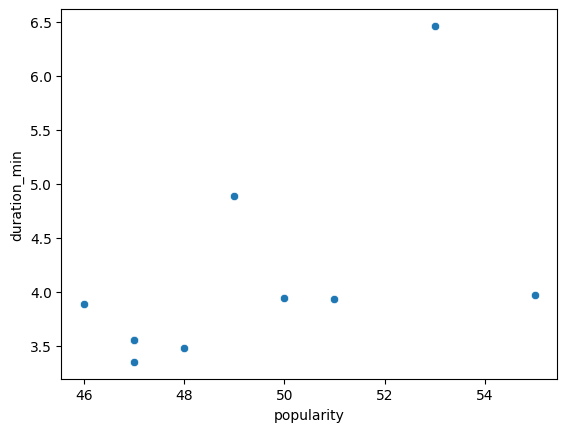

In [36]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = top_songs_df, x = "popularity", y = "duration_min")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

There does not seem to be a relationship between populatity and length of song.